# Classification on FIFA Dataset Using Keras



## 1. Data Exploration

In [48]:
# import packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

In [49]:
# load dataset
df = pd.read_csv('data.csv')

In [50]:
# get type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [51]:
# summary table of data frame
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [52]:
# columns with NA
df.columns[df.isna().sum()!=0]

Index(['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [53]:
# remove missing values 
na = pd.notnull(df["Position"])
df = df[na]

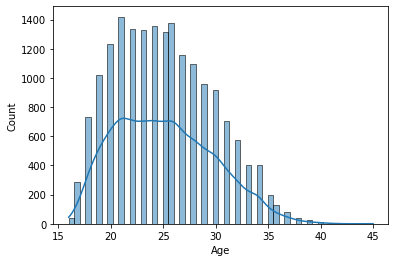

In [55]:
# histgram to show age
sns.histplot(df['Age'],kde=True)

## 2. Feature Selection and Standardization

In [ ]:
# select all variables for model
df = df[["Position", 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']]

In [ ]:
df.head()

,Position,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,RF,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,ST,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,LW,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,GK,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,RCM,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


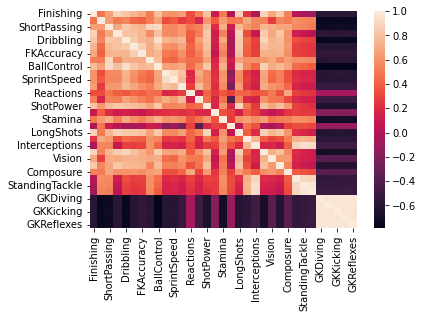

In [45]:
# correlation plot
corr = df.corr()
sns.heatmap(corr)

In [ ]:
forward_player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder_player = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender_player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

In [ ]:
df.loc[df["Position"] == "GK", "Position"] = 0

df.loc[df["Position"].isin(defender_player), "Position"] = 1

df.loc[df["Position"].isin(midfielder_player), "Position"] = 2

df.loc[df["Position"].isin(forward_player), "Position"] = 3

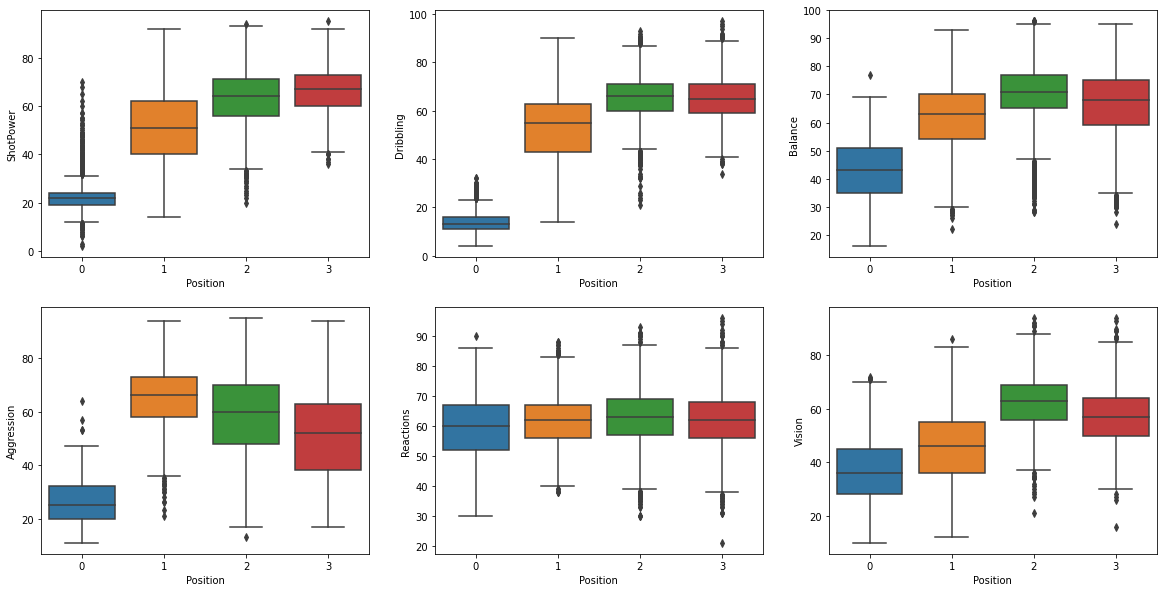

In [ ]:
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Position', y ='ShotPower', data=df, ax=axss[0][0])
sns.boxplot(x='Position', y ='Dribbling', data=df, ax=axss[0][1])
sns.boxplot(x='Position', y ='Balance', data=df, ax=axss[0][2])
sns.boxplot(x='Position', y ='Aggression', data=df, ax=axss[1][0])
sns.boxplot(x='Position', y ='Reactions', data=df, ax=axss[1][1])
sns.boxplot(x='Position', y ='Vision', data=df, ax=axss[1][2])

In [ ]:
x = df.drop("Position", axis = 1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))
y = df["Position"]

In [ ]:
from keras.utils.np_utils import to_categorical
y_cat = to_categorical(y)

## 3. Training Keras Models

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cat, test_size=0.2)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K

model = Sequential()
model.add(Dense(60, input_shape = (33,), activation = "relu"))
model.add(Dense(15, activation = "relu"))
#model.add(Dropout(0.2))
model.add(Dense(4, activation = "softmax"))
model.compile(Adam(lr = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                2040      
                                                                 
 dense_1 (Dense)             (None, 15)                915       
                                                                 
 dense_2 (Dense)             (None, 4)                 64        
                                                                 
Total params: 3,019
Trainable params: 3,019
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.fit(x_train, y_train, verbose=1, epochs=10)


Epoch 1/10
454/454 [==============================] - 1s 2ms/step - loss: 0.3609 - accuracy: 0.8471
Epoch 2/10
454/454 [==============================] - 1s 2ms/step - loss: 0.3120 - accuracy: 0.8704
Epoch 3/10
454/454 [==============================] - 1s 2ms/step - loss: 0.3089 - accuracy: 0.8723
Epoch 4/10
454/454 [==============================] - 1s 2ms/step - loss: 0.3014 - accuracy: 0.8752
Epoch 5/10
454/454 [==============================] - 1s 2ms/step - loss: 0.2927 - accuracy: 0.8786
Epoch 6/10
454/454 [==============================] - 1s 2ms/step - loss: 0.2928 - accuracy: 0.8786
Epoch 7/10
454/454 [==============================] - 1s 2ms/step - loss: 0.2892 - accuracy: 0.8785
Epoch 8/10
454/454 [==============================] - 1s 2ms/step - loss: 0.2835 - accuracy: 0.8812
Epoch 9/10
454/454 [==============================] - 1s 2ms/step - loss: 0.2832 - accuracy: 0.8846
Epoch 10/10
454/454 [==============================] - 1s 2ms/step - loss: 0.2907 - accuracy: 0.8796

## 4. Model Evaluation

### 4.1 Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_class = np.argmax(model.predict(x_test),axis=-1)

In [ ]:
# model prediction
y_pred_class

array([2, 2, 1, ..., 0, 2, 0])

In [ ]:
y_test_class = np.argmax(y_test, axis=1)

In [ ]:
y_test_class

array([1, 2, 1, ..., 0, 2, 0])

In [ ]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 425,    0,    0,    0],
       [   0, 1112,  102,    2],
       [   0,   87, 1182,   78],
       [   0,    2,  145,  495]])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       425
           1       0.93      0.91      0.92      1216
           2       0.83      0.88      0.85      1347
           3       0.86      0.77      0.81       642

    accuracy                           0.89      3630
   macro avg       0.90      0.89      0.90      3630
weighted avg       0.89      0.89      0.89      3630

